In [1]:
from utils import plot_text_mel_alignment,  get_duration_from_textgrid
import os, librosa, random
import numpy as np
from glob import glob

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
textgrid_dir = "/mnt/hdd3/minsu/ICLR2023/mfa/MFAFormatter/result/ESD_dataset/TextGrid"
wav_paths = list(glob("./preprocessed/ESD_dataset/**/**/*.wav", recursive=True) [:20])  # plot 20 samples
                 
random.shuffle(wav_paths)

# mel-preprocess settings
sampling_rate = 16000
hop_length=256
win_length = 1024
n_fft = 1024
n_mels = 80
fmin, fmax = 0, 8000

0017_Angry/0017_000528.wav
0017_Angry/0017_000477.wav
0017_Angry/0017_000687.wav
0017_Angry/0017_000697.wav
0017_Angry/0017_000367.wav
0017_Angry/0017_000600.wav
0017_Angry/0017_000495.wav
0017_Angry/0017_000615.wav
0017_Angry/0017_000676.wav
0017_Angry/0017_000644.wav
0017_Angry/0017_000647.wav
0017_Angry/0017_000571.wav
0017_Angry/0017_000488.wav
0017_Angry/0017_000468.wav
0017_Angry/0017_000622.wav
0017_Angry/0017_000685.wav
0017_Angry/0017_000690.wav
0017_Angry/0017_000561.wav
0017_Angry/0017_000493.wav
0017_Angry/0017_000688.wav


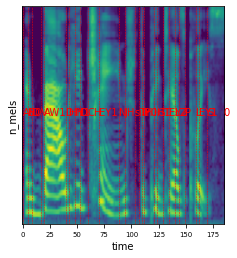

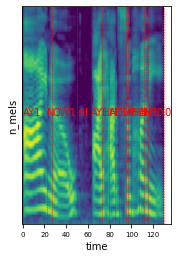

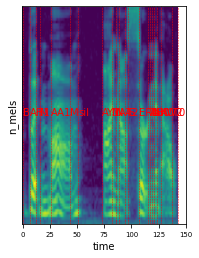

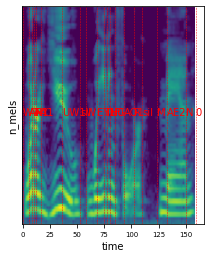

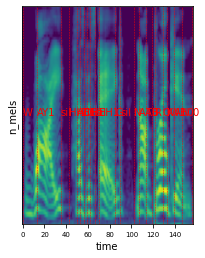

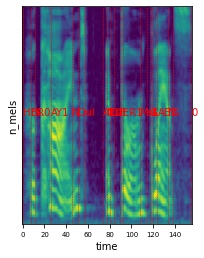

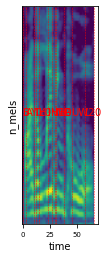

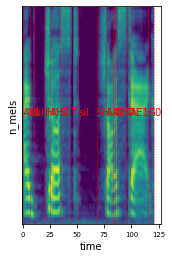

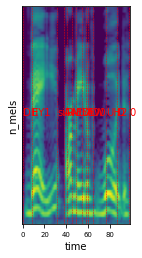

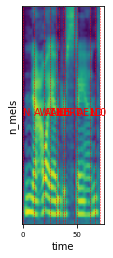

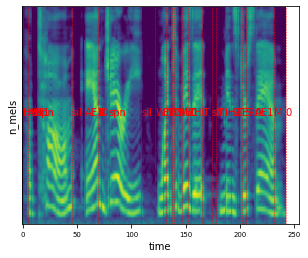

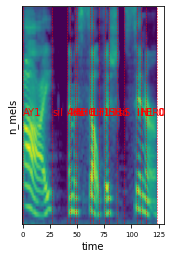

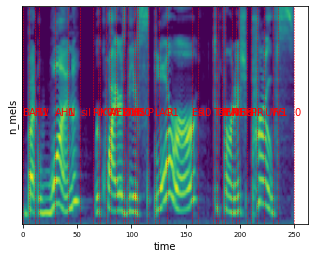

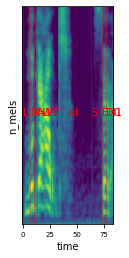

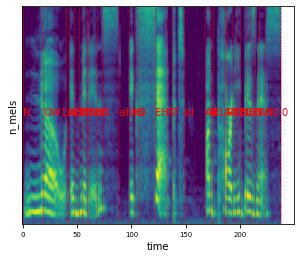

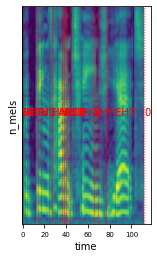

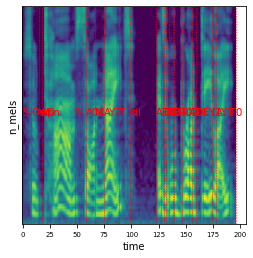

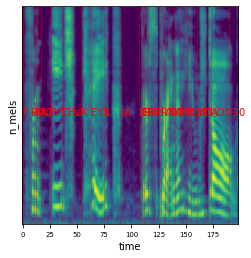

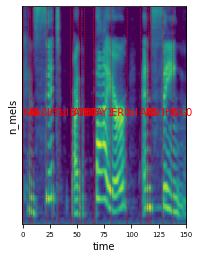

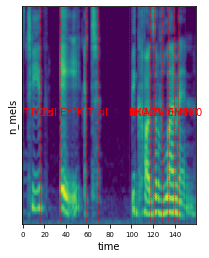

In [5]:
%matplotlib inline

for wav_path in wav_paths:
    wav_filename = "/".join(wav_path.split("/")[-2:])
    textgrid_filepath = os.path.join(textgrid_dir, wav_filename.replace(".wav", ".TextGrid"))
    
    phone_sequence, durations, start_time, end_time = get_duration_from_textgrid(textgrid_filepath, sampling_rate=sampling_rate, hop_length=hop_length)
    phone_sequence.append("0")
    durations.insert(0, 0)
    segmentation_boundary = np.cumsum(durations)
    
    wav, sr = librosa.load(wav_path, sr=sampling_rate)
    
    if sr != sampling_rate:
        print("[ERROR] sampling rate doesn't match! ({}) vs ({})".format(sr, sampling_rate))
        break
        
    mel = librosa.feature.melspectrogram(y=wav[start_time:end_time], sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, win_length=win_length,
                                                fmin=fmin, fmax=fmax, n_mels=n_mels)
    
    mel = librosa.power_to_db(mel, ref=np.max)
    
    print(wav_filename)
    plot_text_mel_alignment(mel, segmentation_boundary, phone_sequence)